In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder 


In [16]:
data = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
data.shape


(7043, 21)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [20]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

AttributeError: module 'seaborn' has no attribute 'show'

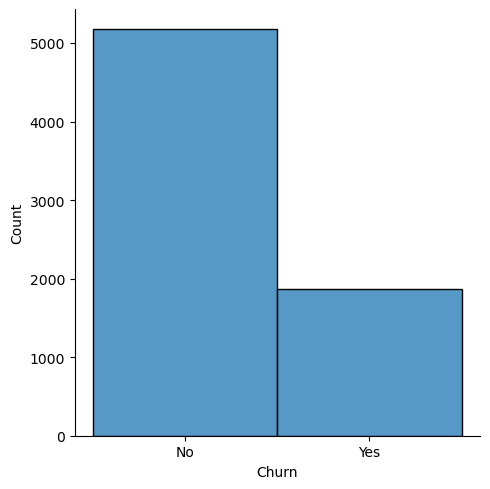

In [21]:
sns.displot(data["Churn"])
sns.show()

In [22]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

<Axes: >

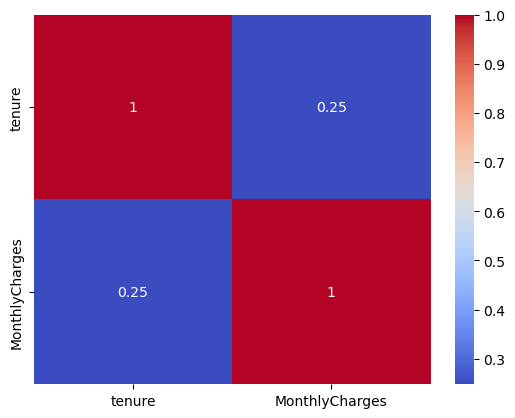

In [23]:
num_cols = ["tenure","MonthlyCharges"]
corr = data[num_cols].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')



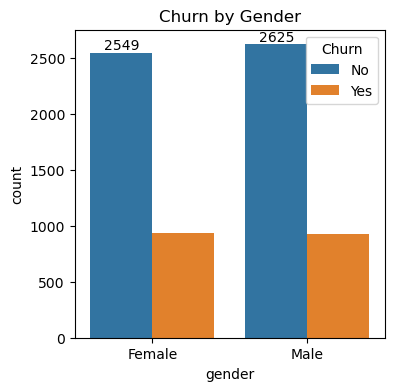

In [24]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x=data["gender"],data=data,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn by Gender")
plt.show()
           
    

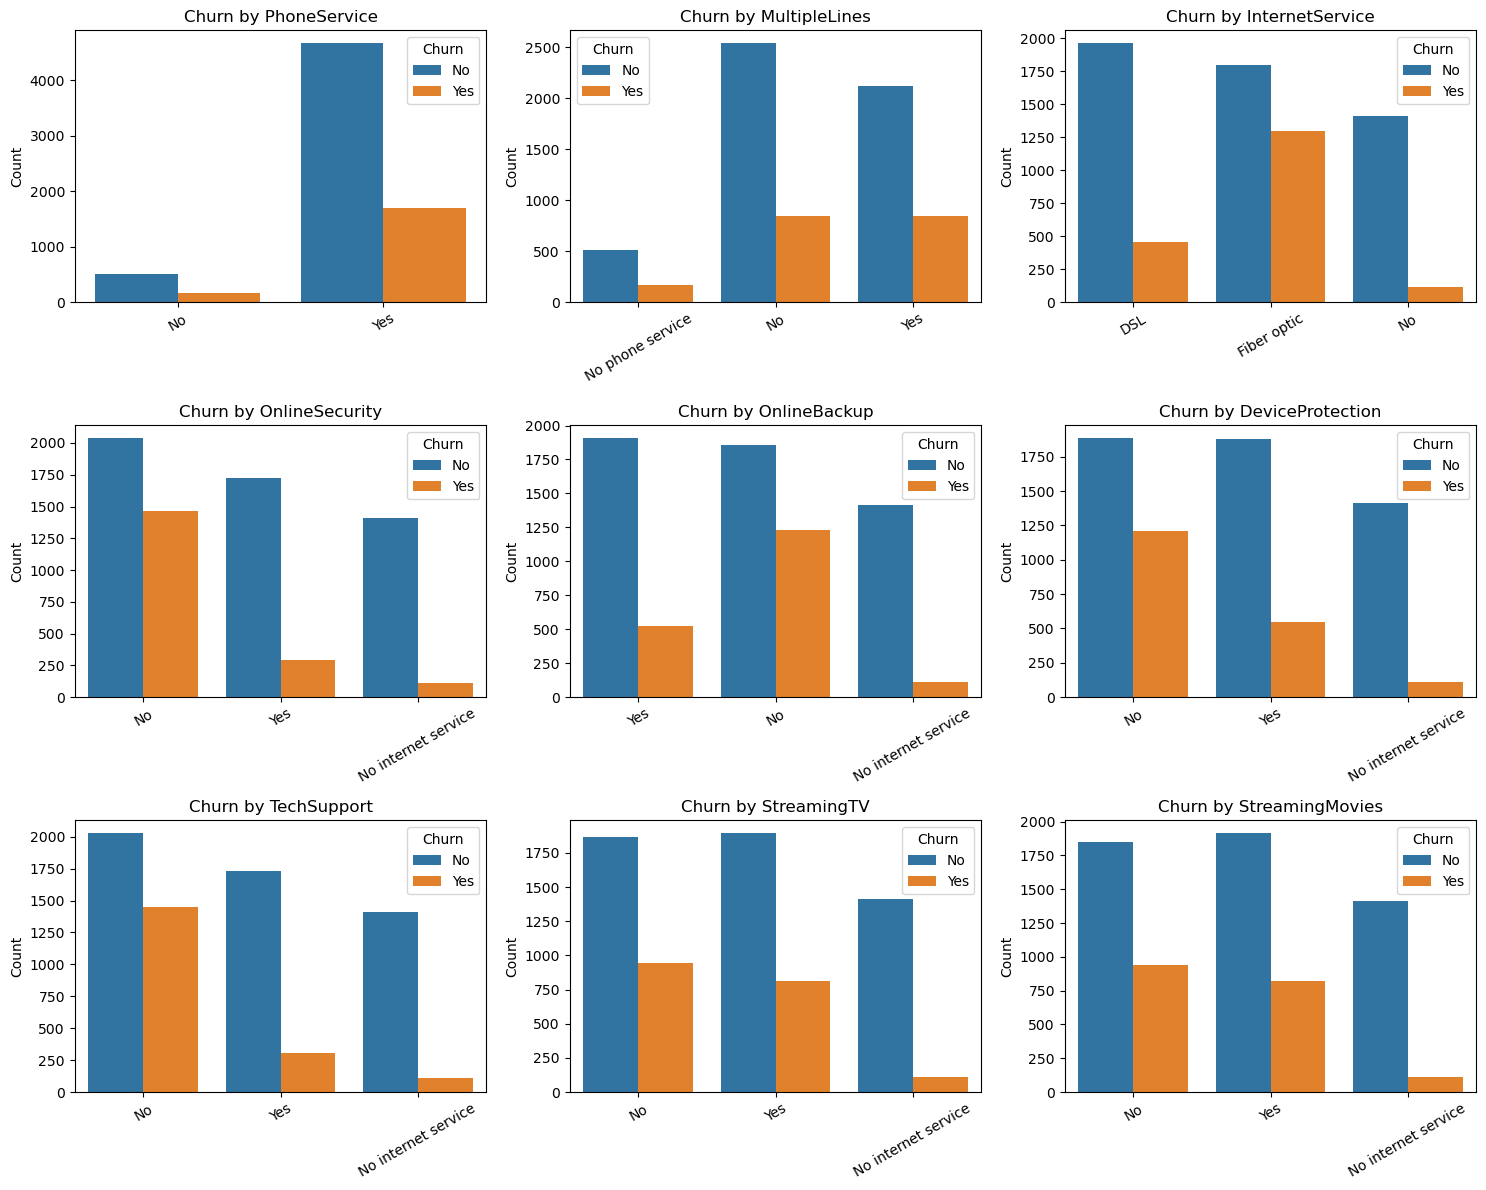

In [11]:
features = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()  

for i, col in enumerate(features):
    sns.countplot(data=data, x=col, hue="Churn", ax=axes[i])
    axes[i].set_title(f"Churn by {col}")
    axes[i].tick_params(axis='x', rotation=30)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

## chi-squared test for finding correlation

In [25]:
cont_list = pd.crosstab(data["SeniorCitizen"],data["Churn"])
chi2, p, dof, ex = chi2_contingency(cont_list)

print("Chi-square test statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p)


if p < 0.05:
    print("There is a significant relationship between feature and target (p < 0.05)")
else:
    print("No significant relationship (p >= 0.05)")


Chi-square test statistic: 159.42630036838742
Degrees of freedom: 1
P-value: 1.510066805092378e-36
There is a significant relationship between feature and target (p < 0.05)


In [26]:
encoder = LabelEncoder()

In [28]:
df = data.drop(columns=["customerID","SeniorCitizen"])
    
    
    
    

In [29]:
df.head()

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
def encode(df,columns=None,return_encoders=False):
    df_encoded = df.copy()
    object_columns = df_encoded.select_dtypes(include=['object']).columns.tolist()
    for cols in object_columns:
        le=LabelEncoder()
        df_encoded[cols] = le.fit_transform(df_encoded[cols])
    print('Succesfuly encoded')
    return df_encoded

encoded_df = encode(df)    

Succesfuly encoded


In [36]:
encoded_df.head()

,gender,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [37]:
categorical_features = ["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]
target = "Churn"

for feature in categorical_features:
    table = pd.crosstab(encoded_df[feature], encoded_df[target])
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"{feature}: chi2 = {chi2:.4f}, p = {p:.4f}")
    if p < 0.05:
        print(f"  ➤ Significant (p < 0.05)")
    else:
        print(f"  ➤ Not significant (p >= 0.05)")

gender: chi2 = 0.4841, p = 0.4866
  ➤ Not significant (p >= 0.05)
Partner: chi2 = 158.7334, p = 0.0000
  ➤ Significant (p < 0.05)
Dependents: chi2 = 189.1292, p = 0.0000
  ➤ Significant (p < 0.05)
PhoneService: chi2 = 0.9150, p = 0.3388
  ➤ Not significant (p >= 0.05)
MultipleLines: chi2 = 11.3304, p = 0.0035
  ➤ Significant (p < 0.05)
InternetService: chi2 = 732.3096, p = 0.0000
  ➤ Significant (p < 0.05)
OnlineSecurity: chi2 = 849.9990, p = 0.0000
  ➤ Significant (p < 0.05)
OnlineBackup: chi2 = 601.8128, p = 0.0000
  ➤ Significant (p < 0.05)
DeviceProtection: chi2 = 558.4194, p = 0.0000
  ➤ Significant (p < 0.05)
TechSupport: chi2 = 828.1971, p = 0.0000
  ➤ Significant (p < 0.05)
StreamingTV: chi2 = 374.2039, p = 0.0000
  ➤ Significant (p < 0.05)
StreamingMovies: chi2 = 375.6615, p = 0.0000
  ➤ Significant (p < 0.05)
Contract: chi2 = 1184.5966, p = 0.0000
  ➤ Significant (p < 0.05)
PaperlessBilling: chi2 = 258.2776, p = 0.0000
  ➤ Significant (p < 0.05)
PaymentMethod: chi2 = 648.1423

## Conclusions
### gender,PhoneService is not significant and can omit them